# Autoregressive Integrated Moving Average (ARIMA)

In [1]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error

# from google.colab import files
# uploaded = files.upload()

# !ls
# !rm "day.csv"


#  Here we are using a dataset on the number of bicycles checkouts from a bike sharing service for a 3 month period

In [6]:
# load in your data "day.csv"
series = read_csv("day.csv", header=0, parse_dates=[1], index_col=1, squeeze=True)
series.head()
# preview your data

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985.0
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801.0
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349.0
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562.0
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600.0


In [13]:
# choose your column : cnt
series.cnt
type(series.cnt)

pandas.core.series.Series

Let's perform a quick plot to understand/visualise what the data looks like.

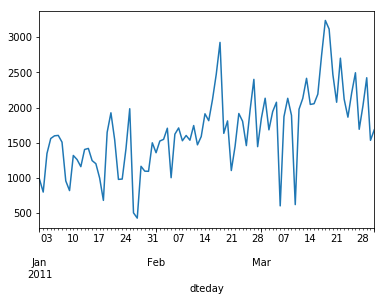

In [15]:
# quick vusalisation
series.cnt.plot()
pyplot.show()

We can see a general increase in the dataset which we can refer to as a trend.  

This suggests that the time series is not stationary and will require differencing to make it stationary.  
This means we are going to try to take out the trend component: d = 1

## p, d, q (arima parameters)

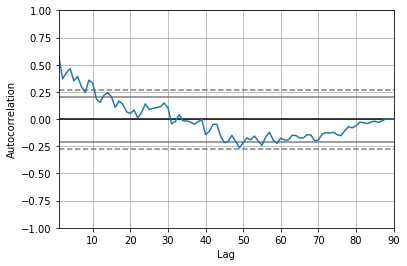

/usr/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


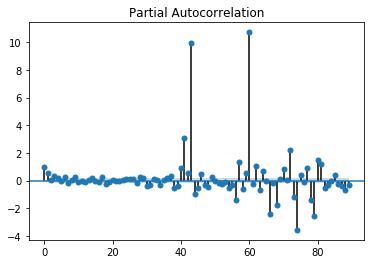

In [16]:
# autocorrelate you data
autocorrelation_plot(series.cnt)
pyplot.show()
# pacf function
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(series.cnt)
pyplot.show()

Get your pdq values to experiment with and fit the model

/usr/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


                             ARIMA Model Results                              
Dep. Variable:                  D.cnt   No. Observations:                   89
Model:                ARIMA(10, 1, 2)   Log Likelihood                -657.903
Method:                       css-mle   S.D. of innovations            379.770
Date:                Thu, 01 Aug 2019   AIC                           1343.807
Time:                        07:24:31   BIC                           1378.648
Sample:                    01-02-2011   HQIC                          1357.850
                         - 03-31-2011                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           13.5904      2.534      5.364      0.000       8.624      18.557
ar.L1.D.cnt     -0.5596      0.107     -5.254      0.000      -0.768      -0.351
ar.L2.D.cnt      0.2506      0.126      1.99

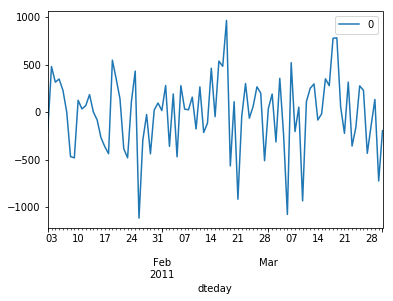

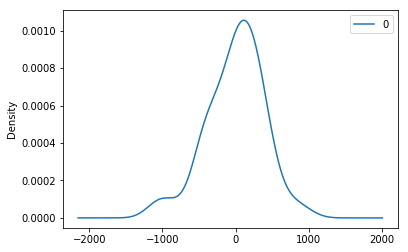

                 0
count    89.000000
mean     -3.778687
std     392.318806
min   -1114.335178
25%    -221.448583
50%      35.577044
75%     268.691929
max     967.510258


In [18]:
# fit the model
# fit the model
# model = ARIMA(series, order=(5,1,3)) # first model still showed some trend so we try (5,2,3)
# model = ARIMA(series, order=(5,2,3)) # gave convergence warning
# model = ARIMA(series, order=(5,2,2)) # gave an error
model = ARIMA(series.cnt, order=(10,1,2))   
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

# plot residual errors


## Rolling Forecast
We now try to use the model to predict future responses.  

predicted=1515.850461, expected=1851.000000
predicted=2052.181834, expected=2134.000000
predicted=1980.299459, expected=1685.000000
predicted=1705.631887, expected=1944.000000
predicted=2139.799475, expected=2077.000000
predicted=1912.433874, expected=605.000000
predicted=1159.169254, expected=1872.000000
predicted=2139.699534, expected=2133.000000
predicted=1655.514681, expected=1891.000000
predicted=1809.604261, expected=623.000000
predicted=1483.714889, expected=1977.000000
predicted=1696.956187, expected=2132.000000
predicted=1737.475233, expected=2417.000000
predicted=1827.869271, expected=2046.000000
predicted=2101.623797, expected=2056.000000
predicted=1756.656597, expected=2192.000000
predicted=2234.214500, expected=2744.000000
predicted=2397.874678, expected=3239.000000
predicted=2721.031397, expected=3117.000000
predicted=2677.889838, expected=2471.000000
predicted=2567.558629, expected=2077.000000
predicted=2532.015899, expected=2703.000000
predicted=2902.034253, expected=21

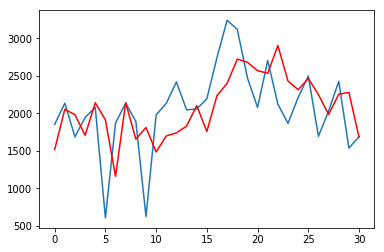

In [19]:
# model prediction
X = series.cnt.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(10,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
